In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [124]:
pwd

'C:\\Users\\hp98'

In [125]:
col_names = ['date', 'ouv', 'haut', 'bas', 'clot', 'vol']
gkcfi = pd.read_csv('GK\GAVEKALCHINAFIXEDINCOMEUCITSAEUR_2020-11-10.txt', sep='\t', header=0, parse_dates=True,
                    dayfirst=True, index_col=0)

columns = gkcfi.columns
gkcfi.head()

,ouv,haut,bas,clot,vol,devise,Unnamed: 7
date,,,,,,,
2016-11-03,146.41,146.41,146.41,146.41,0,EUR,NaN
2016-11-04,146.10,146.10,146.10,146.10,0,EUR,NaN
2016-11-07,146.88,146.88,146.88,146.88,0,EUR,NaN
2016-11-08,146.61,146.61,146.61,146.61,0,EUR,NaN
2016-11-09,147.49,147.49,147.49,147.49,0,EUR,NaN


In [126]:
gkcfi.drop(columns[[0, 1, 2, 4, 5, 6]], axis=1, inplace=True) # clean the data (all columns are the same of empty)
gkcfi.tail()

,clot
date,
2020-10-30,165.07
2020-11-02,165.47
2020-11-03,164.62
2020-11-04,165.97
2020-11-05,164.86


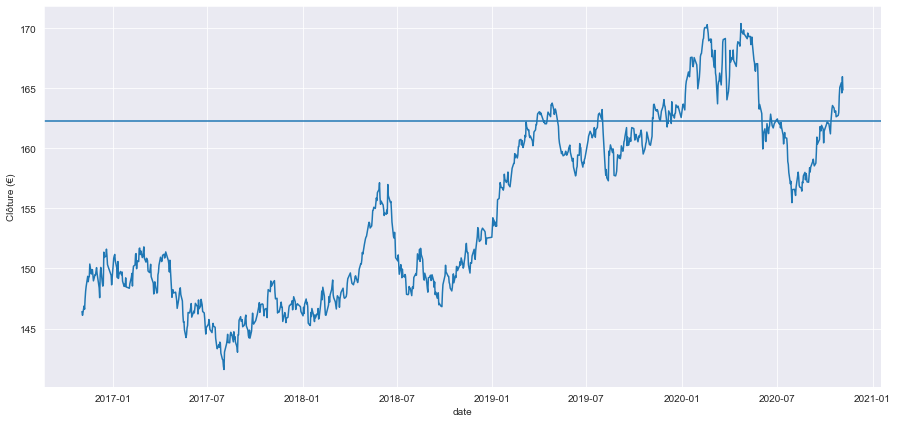

In [127]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=gkcfi, x='date', y='clot')
graph.axhline(162.32)
plt.ylabel('Clôture (€)');

In [128]:
df_invested = gkcfi['2019-11-10':] # slide the df to start at the investment date

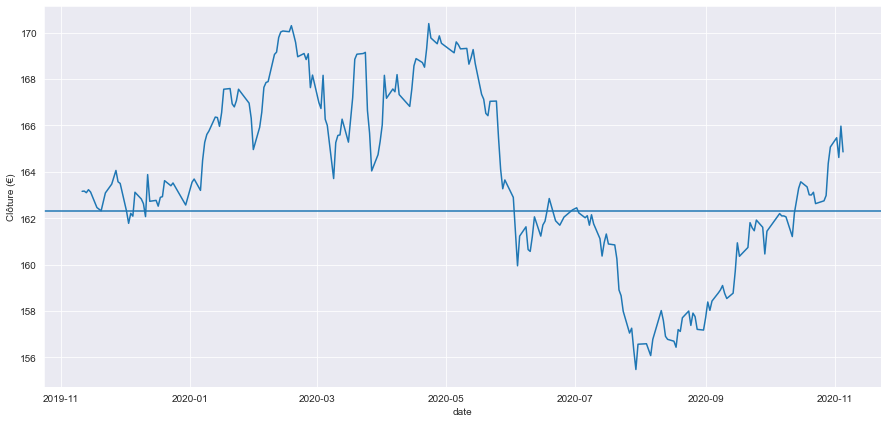

In [129]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=df_invested, x='date', y='clot')
graph.axhline(162.32)
plt.ylabel('Clôture (€)');

In [132]:
perf = 100 * df_invested['clot'] / df_invested['clot'][0]
df_final = pd.concat([df_invested, perf], axis=1) # add a performance column w.r.t. the investment date
df_final.columns = ['clot', 'perf']

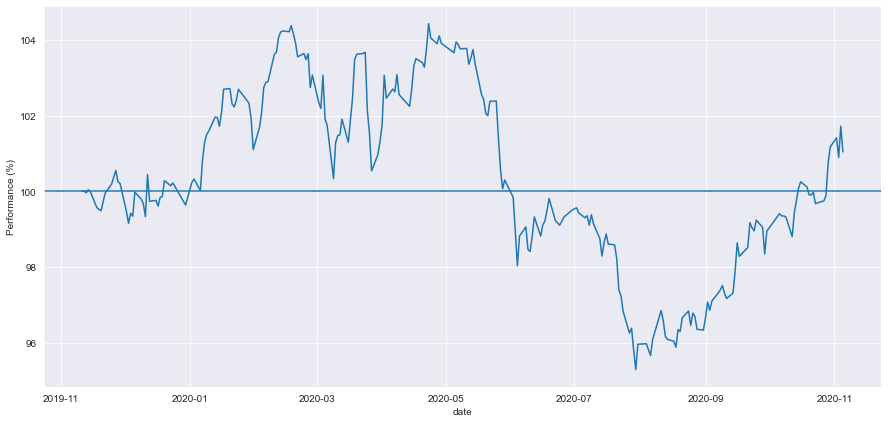

In [135]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=df_final, x='date', y='perf')
graph.axhline(100)
plt.ylabel('Performance (%)'); # plot the performance